In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.preprocessing import StandardScaler
import plotly.express as px
#warnings
import warnings
warnings.simplefilter(action='ignore')

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iris-dataset/iris.csv


In [6]:
# Loading the data
dataset=pd.read_csv('/kaggle/input/iris-dataset/iris.csv')

In [7]:
x = dataset.iloc[:, [0, 1, 2, 3]].values

# Displaying the first 5 rows of the dataset with a background gradient
styled_dataset = dataset.head().style.background_gradient(cmap=sns.cubehelix_palette(as_cmap=True))
styled_dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100000,3.500000,1.400000,0.200000,setosa
1,4.900000,3.000000,1.400000,0.200000,setosa
2,4.700000,3.200000,1.300000,0.200000,setosa
3,4.600000,3.100000,1.500000,0.200000,setosa
4,5.000000,3.600000,1.400000,0.200000,setosa


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
# summary of all attribute
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# number of instances of each class
dataset.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

## Visualize the data

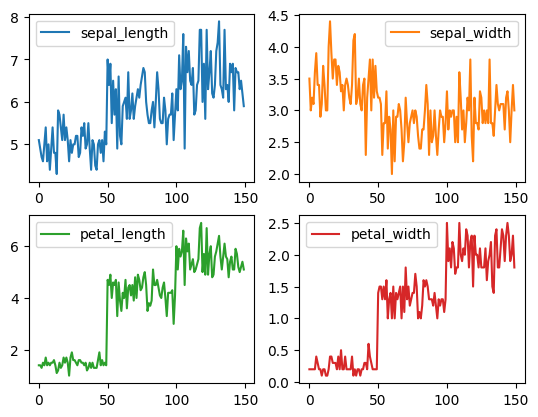

In [12]:
# Univariate analysis
dataset.plot(kind='line', subplots = True, layout = (2,2), sharex = False, sharey = False)
plt.show()

## Exploratory data analysis

In [13]:
# Checking the number of rows and columns in the train dataset
rows, cols = x.shape
print('Rows:', rows, '\nColumns:', cols)

Rows: 150 
Columns: 4


In [14]:
# Check for null values 
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [15]:
# Check for Uniqe elements.
dataset.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [16]:
# Creating a scatter plot with Plotly Express
fig = px.scatter(data_frame=dataset, x='sepal_length', color='species')

# Updating layout
fig.update_layout(width=600,height=400,
                  xaxis=dict(title='Sepal Length', color="#BF40BF"),
                  yaxis=dict(title="Species", color="#BF40BF", showticklabels=False))

# Displaying the plot
fig.show()

In [18]:
# Creating a scatter plot with Plotly Express
fig = px.scatter(data_frame=dataset, x='sepal_width', color='species')

# Updating layout
fig.update_layout(width=600,height=400,
                  xaxis=dict(title='Sepal Length', color="#BF40BF"),
                  yaxis=dict(title="Species", color="#BF40BF", showticklabels=False))

# Displaying the plot
fig.show()

In [19]:
# Creating a scatter plot with Plotly Express
fig = px.scatter(data_frame=dataset, x='petal_length', color='species')

# Updating layout
fig.update_layout(width=600,height=400,
                  xaxis=dict(title='Sepal Length', color="#BF40BF"),
                  yaxis=dict(title="Species", color="#BF40BF", showticklabels=False))

# Displaying the plot
fig.show()

In [20]:
# Creating a scatter plot with Plotly Express
fig = px.scatter(data_frame=dataset, x='petal_width', color='species')

# Updating layout
fig.update_layout(width=600,height=400,
                  xaxis=dict(title='Sepal Length', color="#BF40BF"),
                  yaxis=dict(title="Species", color="#BF40BF", showticklabels=False))

# Displaying the plot
fig.show()

In [21]:
# Creating a scatter plot with Plotly Express
fig = px.scatter(data_frame=dataset, x='sepal_length', y='sepal_width', color='species')

# Updating layout
fig.update_layout(width=800,height=600,
                  xaxis=dict(title='Sepal Length', color="#BF40BF"),
                  yaxis=dict(title='Sepal Width', color="#BF40BF"))

# Displaying the plot
fig.show()

In [22]:
# Creating a scatter plot with Plotly Express
fig = px.scatter(data_frame=dataset, x='petal_length', y='petal_width', color='species')

# Updating layout
fig.update_layout(width=800,height=600,
                  xaxis=dict(title='Petal Length', color="#BF40BF"),
                  yaxis=dict(title='Petal Width', color="#BF40BF"))

# Displaying the plot
fig.show()

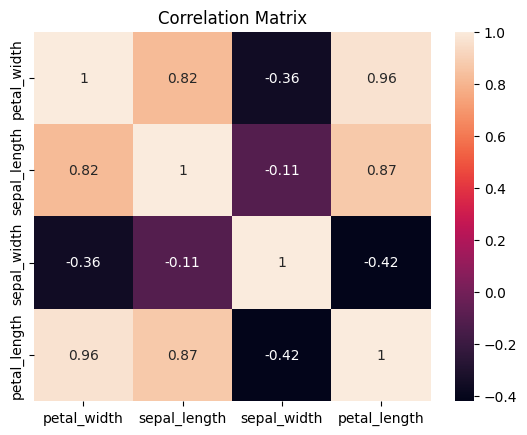

In [23]:
# Selecting numerical columns
num_col = dataset[['petal_width', 'sepal_length', 'sepal_width', 'petal_length']]

# Calculating the correlation matrix and creating a heatmap
correlation_matrix = num_col.corr()
sns.heatmap(correlation_matrix, annot=True)

# Adding a title to the plot
plt.title('Correlation Matrix')

# Displaying the plot
plt.show()

## Model Prepration

In [24]:
# importing libraries for machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Test Train Split

In [25]:
# Separate features and labels
X = dataset.drop('species', axis=1)
y = dataset['species']

In [26]:
# Encode labels into numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [27]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
# perform feature engineering
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Machine Learning Models

### Logistic Regression

In [29]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Logistic Regression:", f"Accuracy: {accuracy*100}" )
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression: Accuracy: 100.0

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### Decision Tree Classifier

In [30]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Decision Tree Classifier:", f"Accuracy: {accuracy*100}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Decision Tree Classifier: Accuracy: 100.0

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### Random Forest Classifier

In [31]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Random Forest Classifier:", f"Accuracy: {accuracy*100}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classifier: Accuracy: 100.0

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### Support Vector Classifier (SVC)

In [32]:
# Support Vector Classifier (SVC)
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Support Vector Classifier:", f"Accuracy: {accuracy*100}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Support Vector Classifier: Accuracy: 100.0

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### Gaussian Naive Bayes

In [33]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Gaussian Naive Bayes:", f"Accuracy: {accuracy*100}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Gaussian Naive Bayes: Accuracy: 97.77777777777777

Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



### K-Nearest Neigbhour Classifier

In [34]:
# K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("K-Nearest Neighbors Classifier:", f"Accuracy: {accuracy*100}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

K-Nearest Neighbors Classifier: Accuracy: 100.0

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

